# Lista 8 - EDA 2 - Grafos - Dijkstra utilizando heap (com ilustrações)
**Aluno: Ícaro Pires de Souza Aragão**<br>
**Matrícula: 15/0129815**

## Preenchendo os dados

In [1]:
from collections import namedtuple

MAX = 10010

Edge = namedtuple('Edge', ('src', 'dest', 'weight'))
Adj = namedtuple('Adj', ('dest', 'weight'))

option = input('Insira Y para inserir as arestas manualmnete ou qualquer outra coisa para que elas sejam pegas do código: ')

if option == 'Y':
    N = int(input('Insira o número de arestas: '))
    edges = [Edge(src, dest, weight) for _ in range(N) for src, dest, weight in
             [map(int, input('\tInsira a origem, destino e peso separados por espaço: ').split())]]
else:
    edges = [
        Edge(1, 2, 9),
        Edge(1, 6, 14),
        Edge(1, 7, 15),
        Edge(2, 3, 23),
        Edge(3, 5, 2),
        Edge(3, 8, 19),
        Edge(4, 3, 6),
        Edge(4, 8, 6),
        Edge(5, 4, 11),
        Edge(5, 8, 16),
        Edge(6, 3, 18),
        Edge(6, 5, 30),
        Edge(6, 7, 5),
        Edge(7, 5, 20),
        Edge(7, 8, 44)
    ]
    N = len(edges)

adjs_list = [[] for _ in range(MAX)]
present_nodes = set()
for src, dest, weight in edges:
    adjs_list[src] += [Adj(dest, weight)]
    
    present_nodes.add(src)
    present_nodes.add(dest)

print('\nLista de adjacências:')
for i in present_nodes:
    print('\tNó {} tem conexão com: {}'.format(
        i, ', '.join(['{} (peso: {})'.format(adj.dest, adj.weight) for adj in adjs_list[i]])
    ))

Insira Y para inserir as arestas manualmnete ou qualquer outra coisa para que elas sejam pegas do código: sdafsadf

Lista de adjacências:
	Nó 1 tem conexão com: 2 (peso: 9), 6 (peso: 14), 7 (peso: 15)
	Nó 2 tem conexão com: 3 (peso: 23)
	Nó 3 tem conexão com: 5 (peso: 2), 8 (peso: 19)
	Nó 4 tem conexão com: 3 (peso: 6), 8 (peso: 6)
	Nó 5 tem conexão com: 4 (peso: 11), 8 (peso: 16)
	Nó 6 tem conexão com: 3 (peso: 18), 5 (peso: 30), 7 (peso: 5)
	Nó 7 tem conexão com: 5 (peso: 20), 8 (peso: 44)
	Nó 8 tem conexão com: 


## Implementando algoritmo

In [2]:
# Rodar primeiro a célula de preenchimento dos dados

from heapq import heappop, heappush

oo = 2**64
dist = [oo for _ in range(MAX)]
pred = [-1 for _ in range(MAX)]
visited = set()


def dijkstra(start):
    global adjs_list
    global visited
    global dist
    global pred
    
    dist[start], pred[start], heap = 0, start, []
    
    heappush(heap, (0, start)) # distância e nó
    
    while heap:
        distance, src = heappop(heap)

             
        if src not in visited:
            visited.add(src)

            for dest, weight in adjs_list[src]:
                if dist[dest] > distance + weight:
                    dist[dest] = distance + weight
                    pred[dest] = src
                    heappush(heap, (dist[dest], dest))

## Utilizando o Algoritmo e Testando

In [3]:
# Utilizando
start = 1
dijkstra(start)

# Reconstruindo caminho
paths = [[-1]]
for node_idx in present_nodes:
    path, aux_idx = [], node_idx

    while aux_idx != start:
        path += [aux_idx]
        aux_idx = pred[aux_idx]

    path += [start]
    paths += [list(reversed(path))]

for i, path in enumerate(paths[1:]):
    path = map(str, path)
    distance = str(dist[node_idx]) if dist[node_idx] != oo else 'INF'
    print('Melhor caminho de {} até {}:\n{}'.format(start, i+1, ' -> '.join(path)))
    print('com distância total = {}: '.format(dist[i+1]), end='\n\n')

Melhor caminho de 1 até 1:
1
com distância total = 0: 

Melhor caminho de 1 até 2:
1 -> 2
com distância total = 9: 

Melhor caminho de 1 até 3:
1 -> 2 -> 3
com distância total = 32: 

Melhor caminho de 1 até 4:
1 -> 2 -> 3 -> 5 -> 4
com distância total = 45: 

Melhor caminho de 1 até 5:
1 -> 2 -> 3 -> 5
com distância total = 34: 

Melhor caminho de 1 até 6:
1 -> 6
com distância total = 14: 

Melhor caminho de 1 até 7:
1 -> 7
com distância total = 15: 

Melhor caminho de 1 até 8:
1 -> 2 -> 3 -> 5 -> 8
com distância total = 50: 



## Visualizando o Grafo

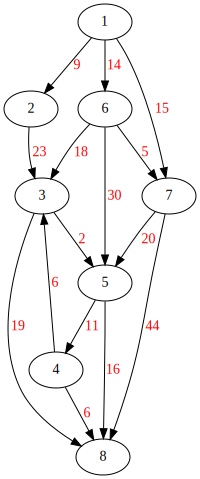

In [4]:
from pydotplus import Dot, Edge, Node
from IPython.display import SVG, display

graph = Dot(graph_type='digraph')

for src, dest, weight in edges:
    edge = Edge(src, dest, label=str(weight), fontcolor='red')
    graph.add_edge(edge)

display(SVG(graph.create_svg()))

## Visualizando menor caminho para o nó mais distante

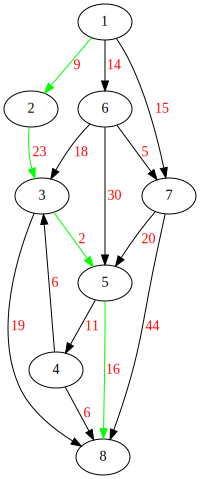

In [5]:
biggest_path = sorted(paths, key=lambda x: (len(x), sum(x)), reverse=True)[0]

for node_idx in biggest_path[1:]:
    edge = graph.get_edge(pred[node_idx], node_idx)[0]
    edge.set_color('green')

display(SVG(graph.create_svg()))

## Referências

[Slides do Professor Edson sobre caminhos mínimos](https://github.com/edsomjr/TEP/blob/master/Grafos/slides/SSP-2/SSP-2.pdf)

Algorithm Design, ÉVA Tardos e Jon Kleiberg, Chapter 4